<a href="https://colab.research.google.com/github/Maher1410/test/blob/main/EfficientNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import seaborn as sns
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
import keras
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D, MaxPooling2D, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
import os
import ipywidgets as widgets
import io
from PIL import Image
from IPython.display import display,clear_output
import numpy as np
from glob import glob
import pathlib
import pandas as pd
import numpy as np
from skimage.io import imread
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from tqdm import tqdm
from PIL import ImageEnhance
from google.colab.patches import cv2_imshow
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import files
uploaded = files.upload()
for fn in uploaded.keys():
  print('User uploaded file "(name)" with length (length) bytes'.format(name=fn, length=len(uploaded[fn])))

!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json
User uploaded file "(name)" with length (length) bytes


In [ ]:
!kaggle datasets download -d alymaher/brain-stroke-ct-scan-image

 96% 192M/201M [00:02<00:00, 99.6MB/s]
100% 201M/201M [00:02<00:00, 93.3MB/s]


In [ ]:
from zipfile import ZipFile
file_name = "/content/brain-stroke-ct-scan-image.zip"
with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('Done')

Done


In [ ]:
file = '/content/Brain_Stroke_CT-SCAN_image/Train/Normal/*'
glob(file)
# Using List Comprehension to read all images
sample1 = [cv2.imread(image) for image in glob(file)]

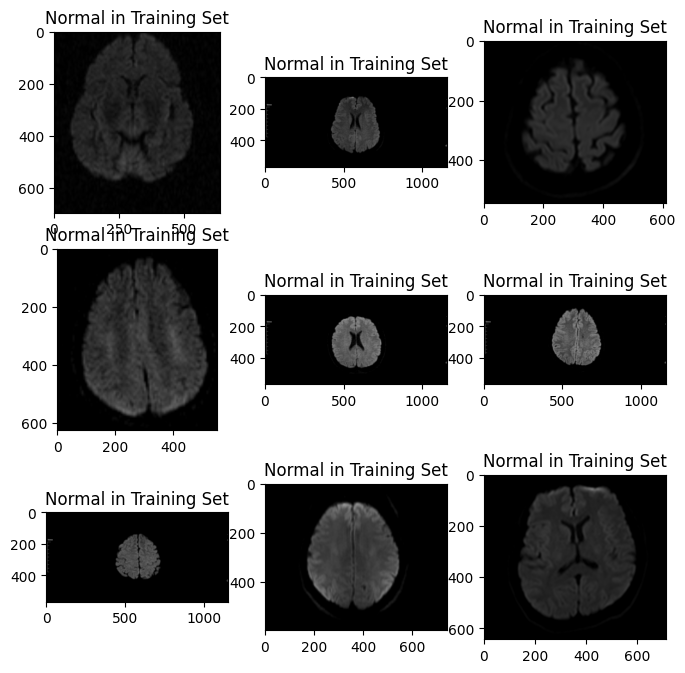

In [ ]:
# Define a figure of size (8, 8)
fig=plt.figure(figsize=(8, 8))
# Define row and cols in the figure
rows, cols = 3, 3
# Display first four images
for j in range(0, cols*rows):
  fig.add_subplot(rows, cols, j+1)
  plt.imshow(sample1[j])
  plt.title("Normal in Training Set")
plt.show()

In [ ]:
file = '/content/Brain_Stroke_CT-SCAN_image/Train/Stroke/*'
glob(file)
# Using List Comprehension to read all images
sample2 = [cv2.imread(image) for image in glob(file)]

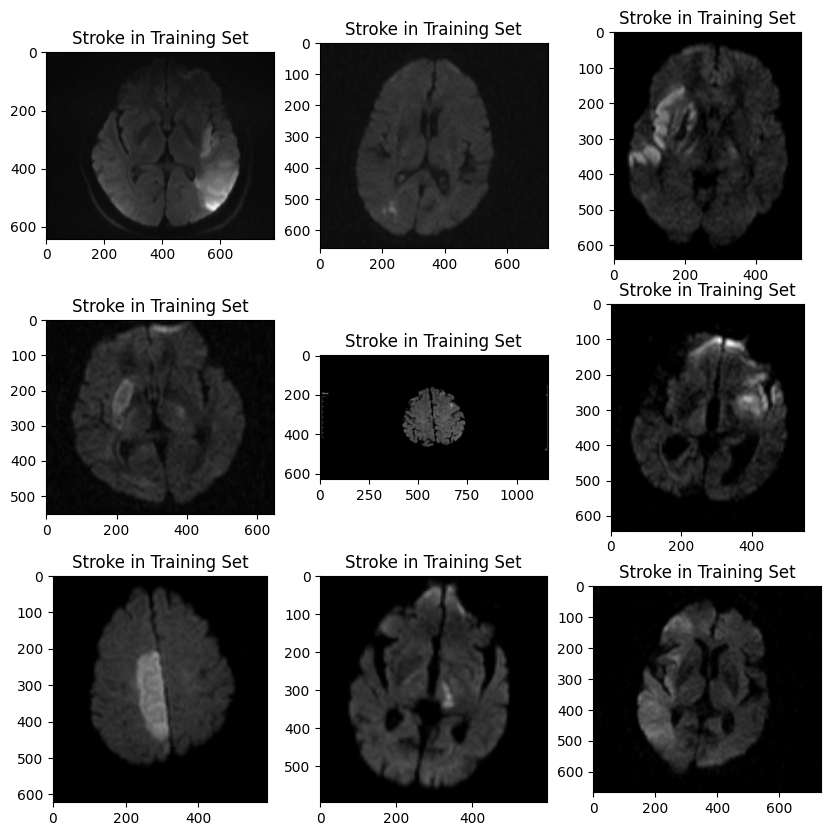

In [ ]:
# Define a figure of size (8, 8)
fig=plt.figure(figsize=(10,10))
# Define row and cols in the figure
rows, cols = 3, 3
# Display first four images
for j in range(0, cols*rows):
  fig.add_subplot(rows, cols, j+1)
  plt.imshow(sample2[j])
  plt.title("Stroke in Training Set")
plt.show()

In [ ]:
file = '/content/Brain_Stroke_CT-SCAN_image/Test/Normal/*'
glob(file)
# Using List Comprehension to read all images
sample3 = [cv2.imread(image) for image in glob(file)]

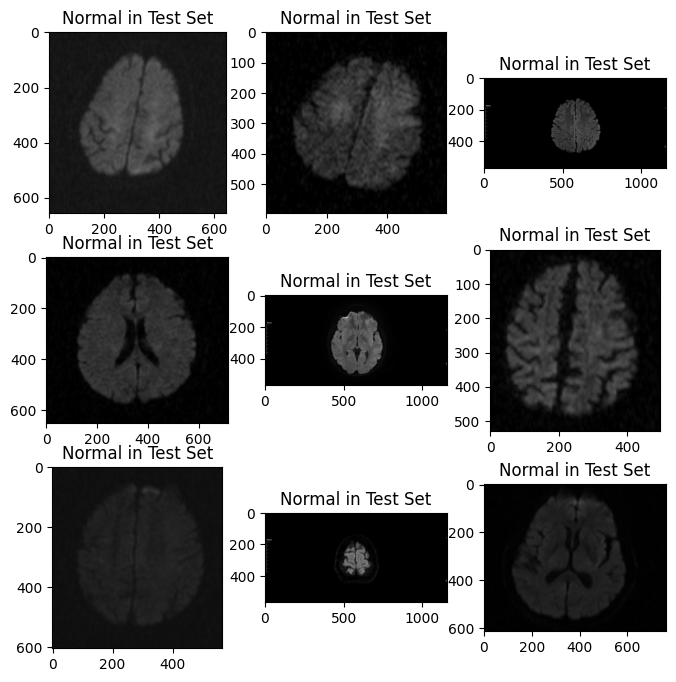

In [ ]:
# Define a figure of size (8, 8)
fig=plt.figure(figsize=(8, 8))
# Define row and cols in the figure
rows, cols = 3, 3
# Display first four images
for j in range(0, cols*rows):
  fig.add_subplot(rows, cols, j+1)
  plt.imshow(sample3[j])
  plt.title("Normal in Test Set")
plt.show()

In [ ]:
file = '/content/Brain_Stroke_CT-SCAN_image/Test/Stroke/*'
glob(file)
# Using List Comprehension to read all images
sample4 = [cv2.imread(image) for image in glob(file)]

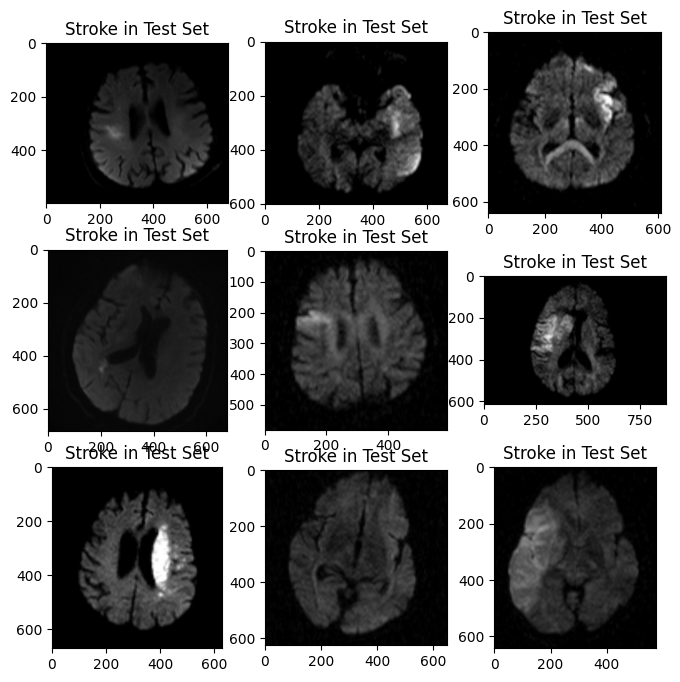

In [ ]:
# Define a figure of size (8, 8)
fig=plt.figure(figsize=(8, 8))
# Define row and cols in the figure
rows, cols = 3, 3
# Display first four images
for j in range(0, cols*rows):
  fig.add_subplot(rows, cols, j+1)
  plt.imshow(sample4[j])
  plt.title("Stroke in Test Set")
plt.show()

In [ ]:
from PIL import Image
import numpy as np
import os

folder_path = '/content/Brain_Stroke_CT-SCAN_image/Train/Normal'

def normalize_images(folder_path):
    # Iterate over all the files in the folder
    for file_name in os.listdir(folder_path):
        if file_name.endswith('.jpg') or file_name.endswith('.png'):
            # Load the image using PIL
            image_path = os.path.join(folder_path, file_name)
            img = Image.open(image_path)

            # Convert the PIL Image to a NumPy array
            img_array = np.array(img)

            # Normalize the image array to have values between 0 and 1
            normalized_img = (img_array - np.min(img_array)) / (np.max(img_array) - np.min(img_array))

            # Convert the NumPy array back to a PIL Image
            normalized_img = Image.fromarray(np.uint8(normalized_img * 255))

            # Save the normalized image
            new_filename1 = 'n_' + file_name
            normalized_img.save(image_path, new_filename1)

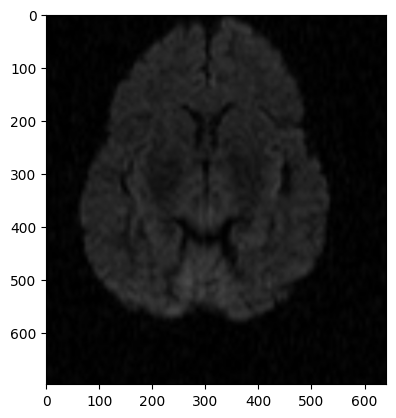

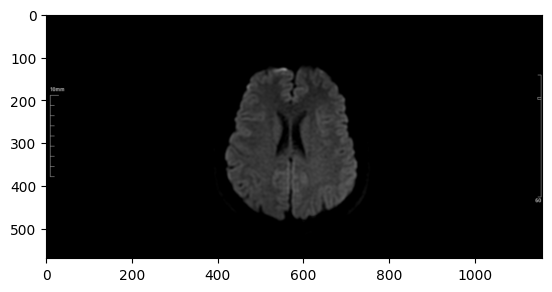

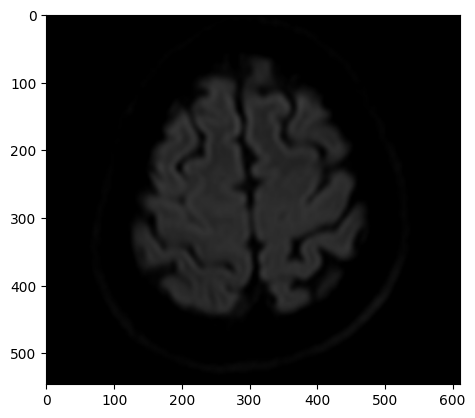

In [ ]:
image_files1 = glob('/content/Brain_Stroke_CT-SCAN_image/Train/Normal/*')

# Use matplotlib to display the first 5 images
for image in image_files1[:3]:
    img1 = plt.imread(image)
    plt.imshow(img1)
    plt.show()

In [ ]:
folder_path2 = '/content/Brain_Stroke_CT-SCAN_image/Train/Stroke'

def normalize_images(folder_path):
    # Iterate over all the files in the folder
    for file_name in os.listdir(folder_path2):
        if file_name.endswith('.jpg') or file_name.endswith('.png'):
            # Load the image using PIL
            image_path2 = os.path.join(folder_path2, file_name)
            img2 = Image.open(image_path2)

            # Convert the PIL Image to a NumPy array
            img_array2 = np.array(img2)

            # Normalize the image array to have values between 0 and 1
            normalized_img2 = (img_array2 - np.min(img_array2)) / (np.max(img_array2) - np.min(img_array2))

            # Convert the NumPy array back to a PIL Image
            normalized_img2 = Image.fromarray(np.uint8(normalized_img2 * 255))

            # Save the normalized image
            new_filename2 = 'n_' + file_name
            normalized_img2.save(image_path2, new_filename2)

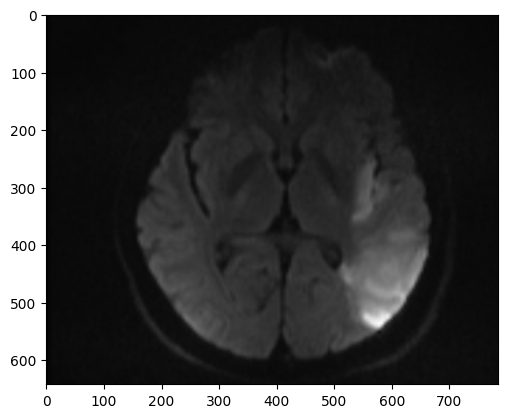

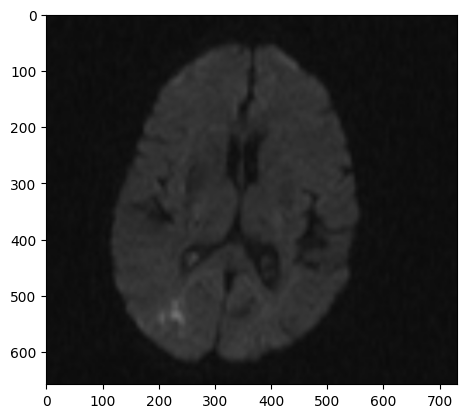

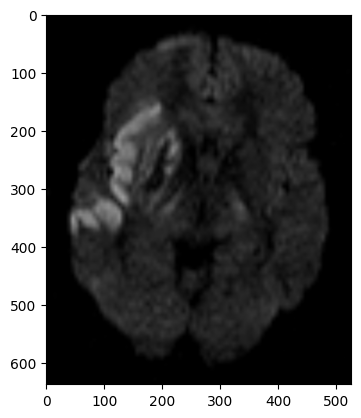

In [ ]:
image_files2 = glob('/content/Brain_Stroke_CT-SCAN_image/Train/Stroke/*')

# Use matplotlib to display the first 5 images
for image in image_files2[:3]:
    img2 = plt.imread(image)
    plt.imshow(img2)
    plt.show()

In [ ]:
folder_path3 = '/content/Brain_Stroke_CT-SCAN_image/Test/Normal'

def normalize_images(folder_path):
    # Iterate over all the files in the folder
    for file_name in os.listdir(folder_path3):
        if file_name.endswith('.jpg') or file_name.endswith('.png'):
            # Load the image using PIL
            image_path3 = os.path.join(folder_path3, file_name)
            img3 = Image.open(image_path3)

            # Convert the PIL Image to a NumPy array
            img_array3 = np.array(img3)

            # Normalize the image array to have values between 0 and 1
            normalized_img3 = (img_array3 - np.min(img_array3)) / (np.max(img_array3) - np.min(img_array3))

            # Convert the NumPy array back to a PIL Image
            normalized_img3 = Image.fromarray(np.uint8(normalized_img3 * 255))

            # Save the normalized image
            new_filename3 = 'n_' + file_name
            normalized_img3.save(image_path3, new_filename3)

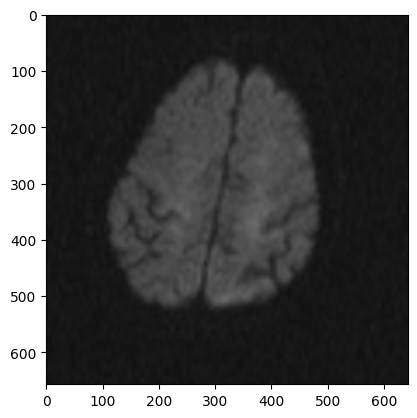

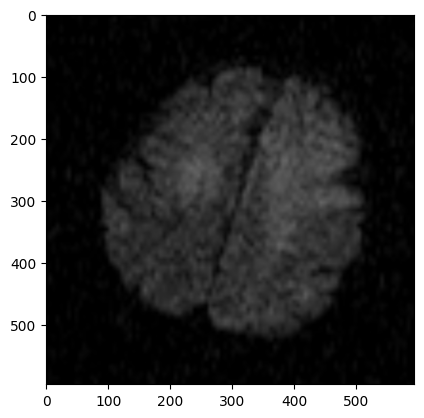

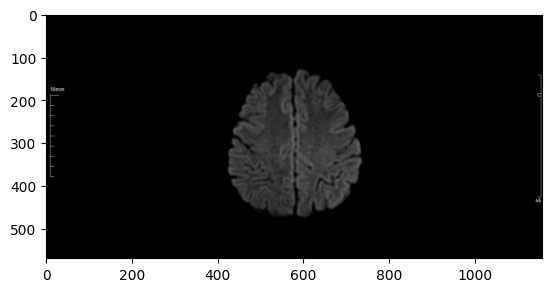

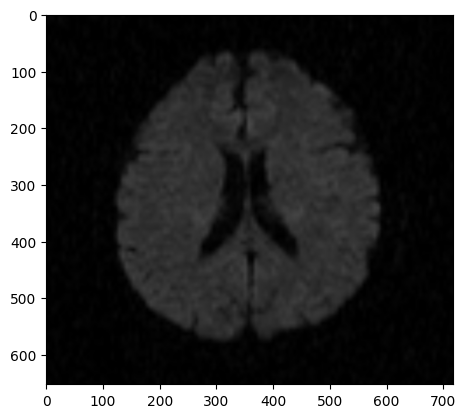

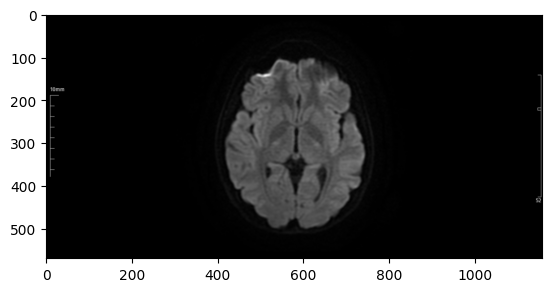

In [ ]:
image_files3 = glob('/content/Brain_Stroke_CT-SCAN_image/Test/Normal/*')

# Use matplotlib to display the first 5 images
for image in image_files3[:5]:
    img3 = plt.imread(image)
    plt.imshow(img3)
    plt.show()

In [ ]:
folder_path4 = '/content/Brain_Stroke_CT-SCAN_image/Test/Stroke'

def normalize_images(folder_path):
    # Iterate over all the files in the folder
    for file_name in os.listdir(folder_path4):
        if file_name.endswith('.jpg') or file_name.endswith('.png'):
            # Load the image using PIL
            image_path4 = os.path.join(folder_path4, file_name)
            img4 = Image.open(image_path4)

            # Convert the PIL Image to a NumPy array
            img_array4 = np.array(img4)

            # Normalize the image array to have values between 0 and 1
            normalized_img4 = (img_array4 - np.min(img_array4)) / (np.max(img_array4) - np.min(img_array4))

            # Convert the NumPy array back to a PIL Image
            normalized_img4 = Image.fromarray(np.uint8(normalized_img4 * 255))

            # Save the normalized image
            new_filename4 = 'n_' + file_name
            normalized_img4.save(image_path4, new_filename4)

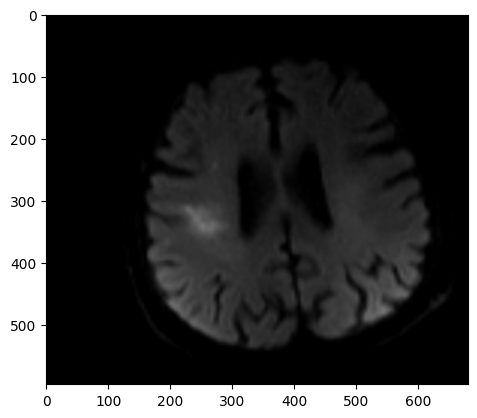

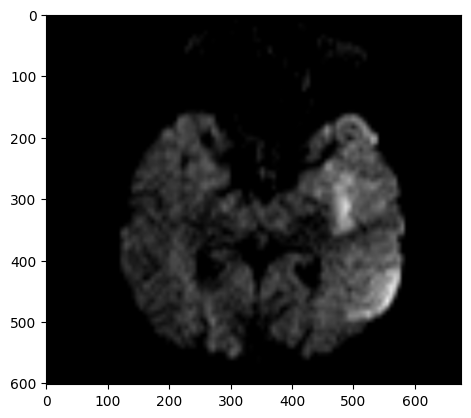

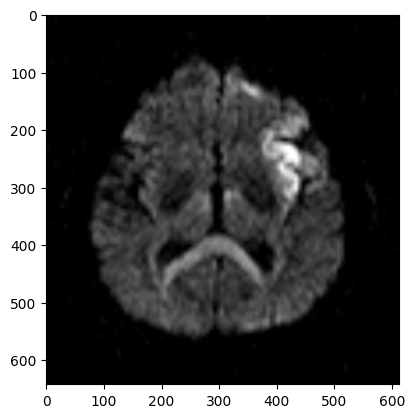

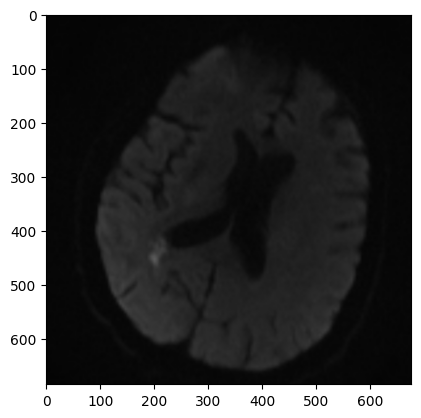

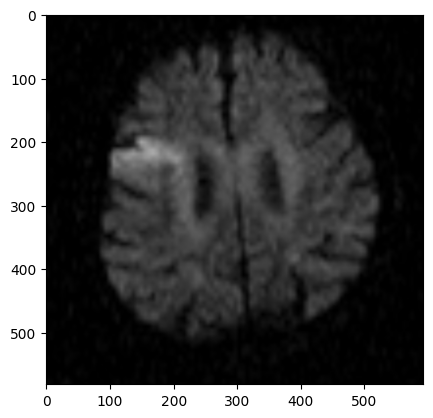

In [ ]:
image_files4 = glob('/content/Brain_Stroke_CT-SCAN_image/Test/Stroke/*')

# Use matplotlib to display the first 5 images
for image in image_files4[:5]:
    img4 = plt.imread(image)
    plt.imshow(img4)
    plt.show()

In [ ]:
import cv2
import os

# Create SIFT object
sift = cv2.xfeatures2d.SIFT_create()

# Loop through all the image files in the folder
for filename in os.listdir('/content/Brain_Stroke_CT-SCAN_image/Train/Normal'):
    if filename.endswith('.jpg') or filename.endswith('.png'):
        # Read the image file
        img = cv2.imread(os.path.join('/content/Brain_Stroke_CT-SCAN_image/Train/Normal', filename))

        # Convert the image to grayscale
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

        # Detect keypoints and compute descriptors using SIFT
        kp, des = sift.detectAndCompute(gray, None)

        # Draw keypoints on the image and save it
        img_with_kp = cv2.drawKeypoints(gray, kp, img)
        cv2.imwrite(os.path.join('/content/Brain_Stroke_CT-SCAN_image/Train/Normal', filename), img_with_kp)

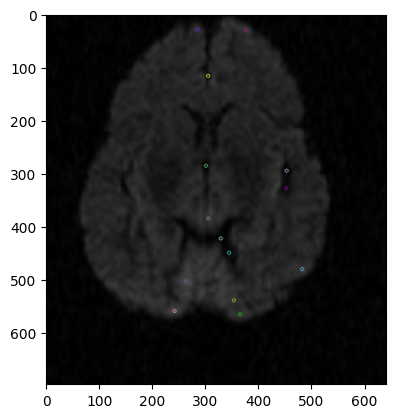

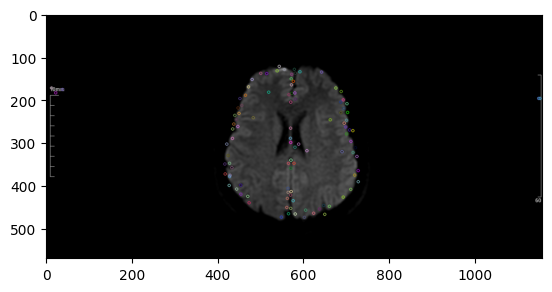

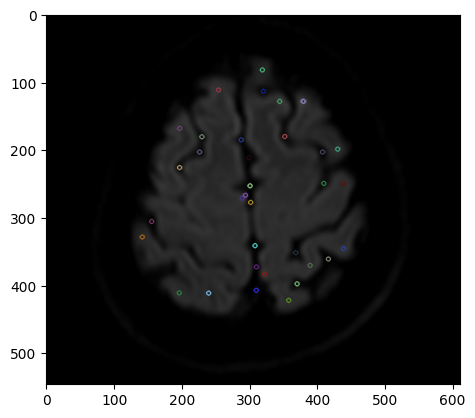

In [ ]:
image_files5 = glob('/content/Brain_Stroke_CT-SCAN_image/Train/Normal/*')

# Use matplotlib to display the first 5 images
for image in image_files5[:3]:
    img5 = plt.imread(image)
    plt.imshow(img5)
    plt.show()

In [ ]:
# Create SIFT object
sift = cv2.xfeatures2d.SIFT_create()

# Loop through all the image files in the folder
for filename in os.listdir('/content/Brain_Stroke_CT-SCAN_image/Train/Stroke'):
    if filename.endswith('.jpg') or filename.endswith('.png'):
        # Read the image file
        img = cv2.imread(os.path.join('/content/Brain_Stroke_CT-SCAN_image/Train/Stroke', filename))

        # Convert the image to grayscale
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

        # Detect keypoints and compute descriptors using SIFT
        kp, des = sift.detectAndCompute(gray, None)

        # Draw keypoints on the image and save it
        img_with_kp = cv2.drawKeypoints(gray, kp, img)
        cv2.imwrite(os.path.join('/content/Brain_Stroke_CT-SCAN_image/Train/Stroke', filename), img_with_kp)

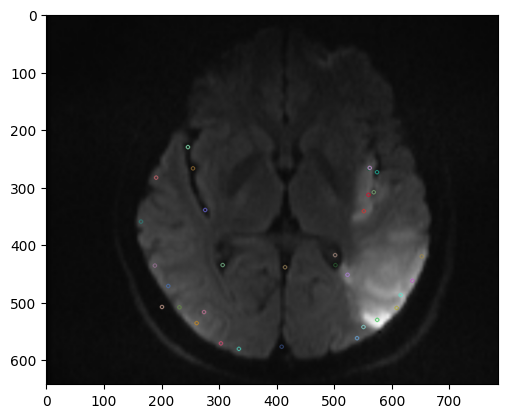

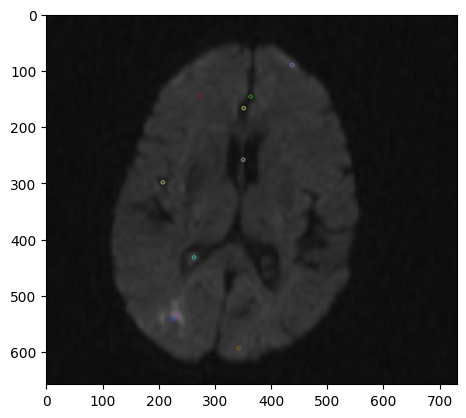

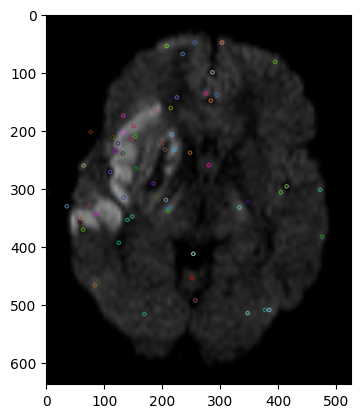

In [ ]:
image_files6 = glob('/content/Brain_Stroke_CT-SCAN_image/Train/Stroke/*')

# Use matplotlib to display the first 5 images
for image in image_files6[:3]:
    img6 = plt.imread(image)
    plt.imshow(img6)
    plt.show()

In [ ]:
# Create SIFT object
sift = cv2.xfeatures2d.SIFT_create()

# Loop through all the image files in the folder
for filename in os.listdir('/content/Brain_Stroke_CT-SCAN_image/Test/Normal'):
    if filename.endswith('.jpg') or filename.endswith('.png'):
        # Read the image file
        img = cv2.imread(os.path.join('/content/Brain_Stroke_CT-SCAN_image/Test/Normal', filename))

        # Convert the image to grayscale
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

        # Detect keypoints and compute descriptors using SIFT
        kp, des = sift.detectAndCompute(gray, None)

        # Draw keypoints on the image and save it
        img_with_kp = cv2.drawKeypoints(gray, kp, img)
        cv2.imwrite(os.path.join('/content/Brain_Stroke_CT-SCAN_image/Test/Normal', filename), img_with_kp)

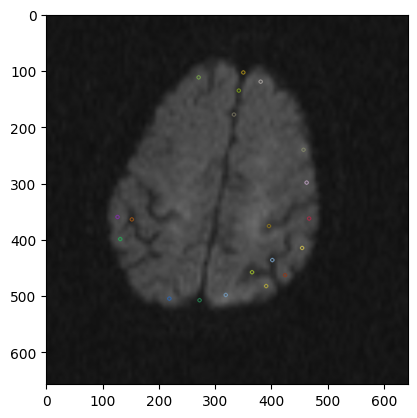

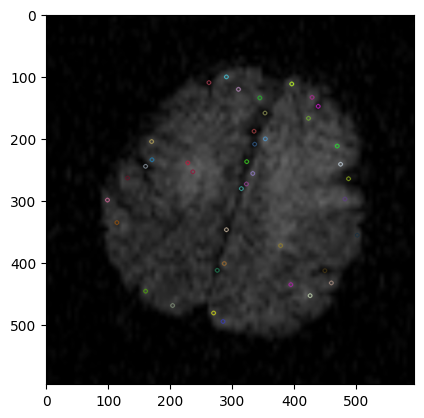

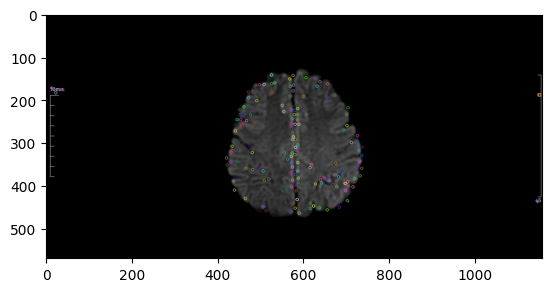

In [ ]:
image_files7 = glob('/content/Brain_Stroke_CT-SCAN_image/Test/Normal/*')

# Use matplotlib to display the first 5 images
for image in image_files7[:3]:
    img7 = plt.imread(image)
    plt.imshow(img7)
    plt.show()

In [ ]:
# Create SIFT object
sift = cv2.xfeatures2d.SIFT_create()

# Loop through all the image files in the folder
for filename in os.listdir('/content/Brain_Stroke_CT-SCAN_image/Test/Stroke'):
    if filename.endswith('.jpg') or filename.endswith('.png'):
        # Read the image file
        img = cv2.imread(os.path.join('/content/Brain_Stroke_CT-SCAN_image/Test/Stroke', filename))

        # Convert the image to grayscale
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

        # Detect keypoints and compute descriptors using SIFT
        kp, des = sift.detectAndCompute(gray, None)

        # Draw keypoints on the image and save it
        img_with_kp = cv2.drawKeypoints(gray, kp, img)
        cv2.imwrite(os.path.join('/content/Brain_Stroke_CT-SCAN_image/Test/Stroke', filename), img_with_kp)

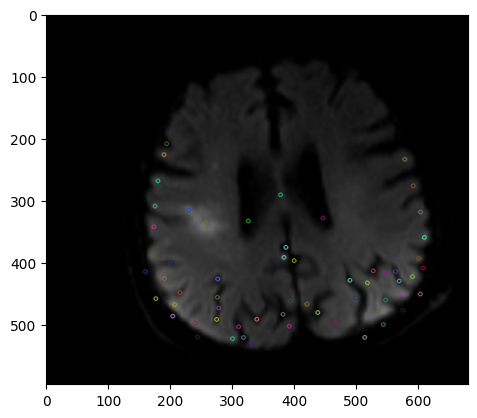

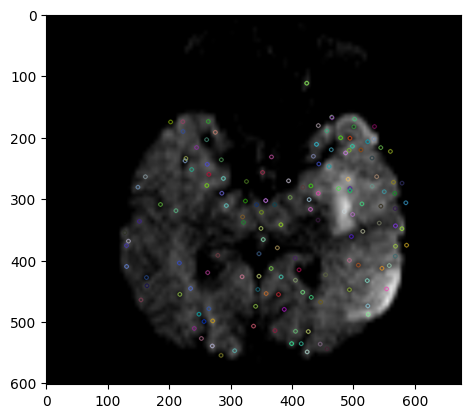

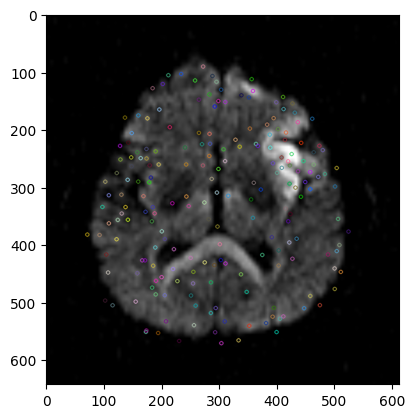

In [ ]:
image_files8= glob('/content/Brain_Stroke_CT-SCAN_image/Test/Stroke/*')

# Use matplotlib to display the first 5 images
for image in image_files8[:3]:
    img8 = plt.imread(image)
    plt.imshow(img8)
    plt.show()

In [ ]:
train_img = []
train_labels = []

test_img = []
test_labels = []

path_train = ('/content/Brain_Stroke_CT-SCAN_image/Train/')
path_test = ('/content/Brain_Stroke_CT-SCAN_image/Test/')
img_size= 300

for i in os.listdir(path_train):
    for j in os.listdir(path_train+i):
        train_img.append (cv2.resize(cv2.imread(path_train+i+'/'+j), (img_size,img_size)))
        train_labels.append(i)

for i in os.listdir(path_test):
    for j in os.listdir(path_test+i):
        test_img.append (cv2.resize(cv2.imread(path_test+i+'/'+j), (img_size,img_size)))
        test_labels.append(i)

train_img = (np.array(train_img))
test_img = (np.array(test_img))

In [ ]:
img_datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True)

img_datagen.fit(train_img)
img_datagen.fit(test_img)

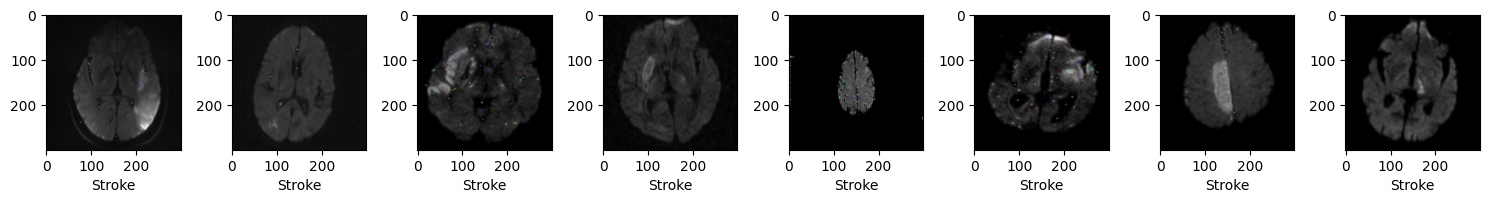

In [ ]:
plt.figure(figsize = (15,15));
for i,j in enumerate(train_img):
    if i<8:
        plt.subplot(1,8,i+1)
        plt.imshow(j);
        plt.xlabel(train_labels[i]);
        plt.tight_layout()
    else:
        break

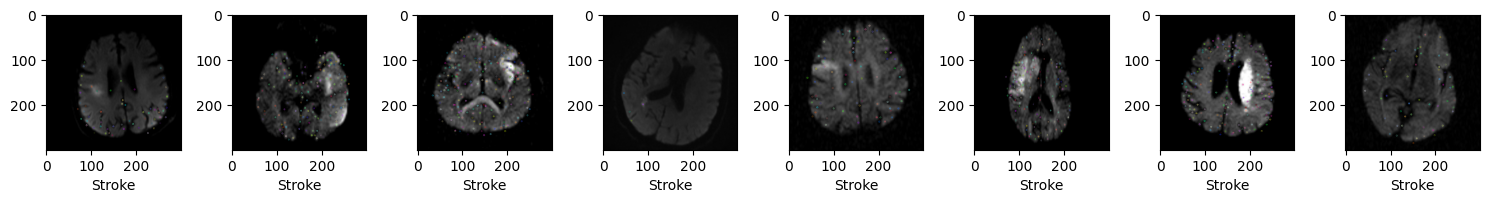

In [ ]:
plt.figure(figsize = (15,15));
for i,j in enumerate(test_img):
    if i<8:
        plt.subplot(1,8,i+1)
        plt.imshow(j);
        plt.xlabel(test_labels[i]);
        plt.tight_layout()
    else:
        break

In [ ]:
train_x, test_x, train_y, test_y = train_test_split(np.array(train_img), np.array(train_labels), test_size = 0.2)
train_x.shape, train_y.shape, test_x.shape, test_y.shape

((1480, 300, 300, 3), (1480,), (370, 300, 300, 3), (370,))

In [ ]:
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential

# Load the EfficientNetB0 model
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(300,300, 3))

# Freeze the base model layers
base_model.trainable = False

# Add new classification layers on top of the base model
model_ENB = Sequential([
    base_model,
    Flatten(),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(2, activation='softmax')
])

# Compile the model
model_ENB.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

16705208/16705208 [==============================] - 0s 0us/step


In [ ]:
history = model_ENB.fit(tf.cast(train_img, tf.float32), np.array(pd.get_dummies(train_labels)),validation_split= 0.1, epochs=10, verbose=1, batch_size=32)

Epoch 1/10
53/53 [==============================] - 344s 6s/step - loss: 0.1085 - accuracy: 0.9706 - val_loss: 2.5131 - val_accuracy: 0.6757
Epoch 2/10
53/53 [==============================] - 321s 6s/step - loss: 0.2830 - accuracy: 0.9375 - val_loss: 1.4005 - val_accuracy: 0.8108
Epoch 3/10
53/53 [==============================] - 321s 6s/step - loss: 0.1402 - accuracy: 0.9652 - val_loss: 0.4101 - val_accuracy: 0.9351
Epoch 4/10
53/53 [==============================] - 307s 6s/step - loss: 0.1064 - accuracy: 0.9730 - val_loss: 1.9705 - val_accuracy: 0.6919
Epoch 5/10
53/53 [==============================] - 323s 6s/step - loss: 0.0443 - accuracy: 0.9862 - val_loss: 0.4330 - val_accuracy: 0.9081
Epoch 6/10
53/53 [==============================] - 306s 6s/step - loss: 0.0114 - accuracy: 0.9976 - val_loss: 0.8065 - val_accuracy: 0.8865
Epoch 7/10
53/53 [==============================] - 320s 6s/step - loss: 0.0133 - accuracy: 0.9952 - val_loss: 0.7478 - val_accuracy: 0.8865
Epoch 8/10
53

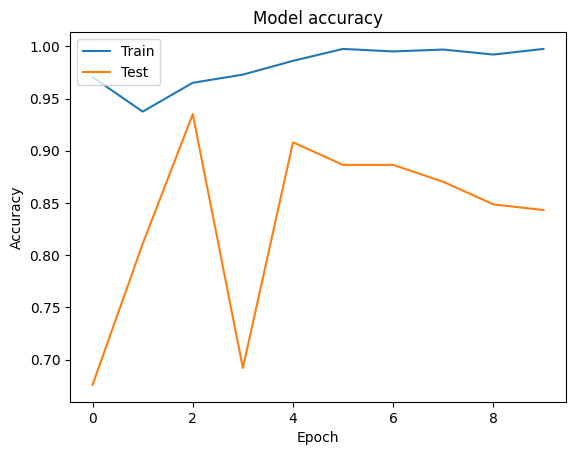

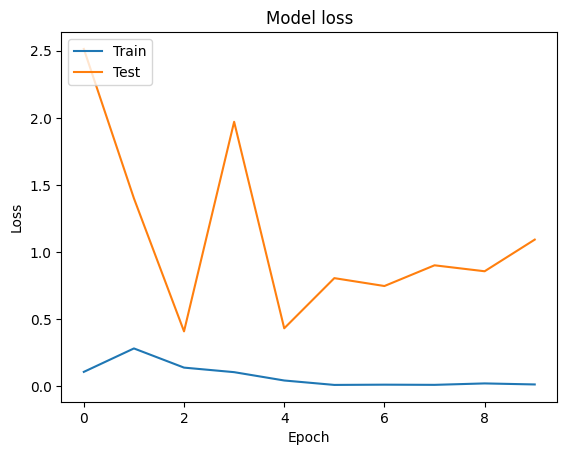

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

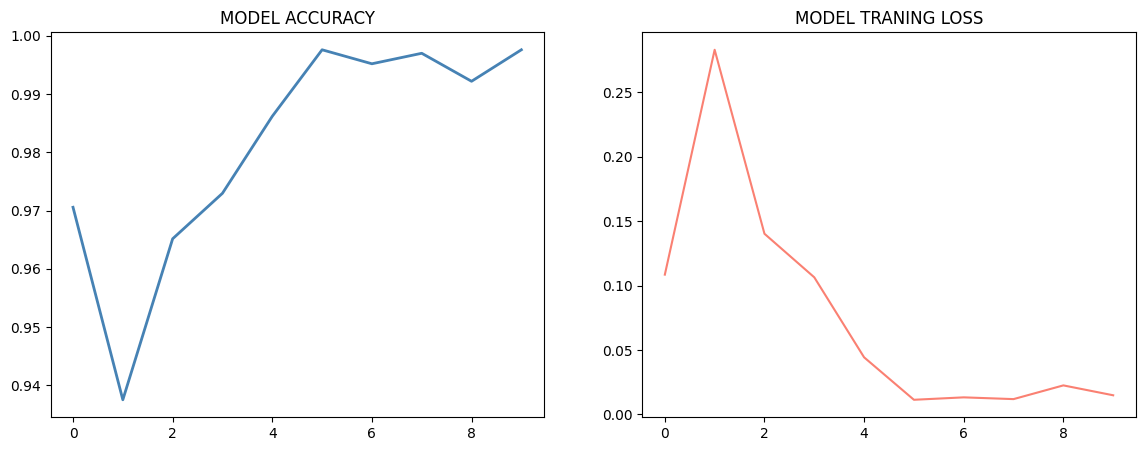

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(14,5))
ax[0].set_title('MODEL ACCURACY')
ax[1].set_title('MODEL TRANING LOSS')
ax[0].plot(history.history['accuracy'], color= 'steelblue', lw=2);
ax[1].plot(history.history['loss'], color='salmon');

In [ ]:
predicted_probabilities = model_ENB.predict(test_img)

# convert the probabilities to class labels
predicted_classes = np.argmax(predicted_probabilities, axis=1)

4/4 [==============================] - 18s 4s/step


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Concatenate the training and test sets
all_labels = np.concatenate((train_labels, test_labels))

# Create a LabelEncoder object and fit_transform the concatenated labels
le = LabelEncoder()
all_labels_encoded = le.fit_transform(all_labels)

# Split the encoded labels back into training and test sets
train_labels_encoded = all_labels_encoded[:len(train_labels)]
test_labels_encoded = all_labels_encoded[len(test_labels):]

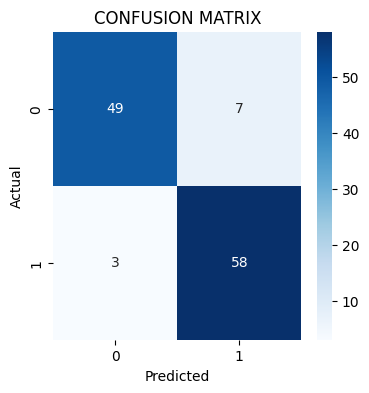

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix

# create a label encoder object
le = LabelEncoder()

# fit and transform the test labels
test_labels_encoded = le.fit_transform(test_labels)

# compute the confusion matrix
conf_mat = confusion_matrix(test_labels_encoded, predicted_classes)

# plot the confusion matrix
plt.figure(figsize=(4,4))
plt.title('CONFUSION MATRIX')
sns.heatmap(conf_mat, annot=True, cmap="Blues", fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()